# Constrained Population Growth
This document follows the development of module 2.3 Angela B. and George W Shiflet's
book [Introduction to Computational Science](https://ics.wofford-ecs.org/).

In this document, we modify the unconstrained growth problem to include the effects of limited resources.  This introduces the concept of carrying capacity.  In this case, the population growth is $\frac{dP}{dt}=\frac{dB}{dt} - \frac{dD}{dt}$ in which $P$ is the population, $\frac{dB}{dt}=rP$ is the birth rate, and $\frac{dD}{dt}=r\frac{P}{M}P$ is the death rate.  In this expression, $M$ is the carrying capacity of the environment.  Note that this differential equation is very similar to the unconstrained growth problem, but includes the extra term $\frac{dD}{dt}=r\frac{P}{M}P$ which limits the growth rate.

## Initialization
This section contains initialization code which gives this notebook the resources it needs to run.

In [1]:
#This code performs the necessary steps to prepare to plot.
from matplotlib import pyplot
from math import *
    
#Set the default plot to be inline rather than a new window.
%matplotlib inline

import inspect  #This allows us to print the source code in this notebook.
from SDExamples import *  #Import the custom functions from this project.

goldenratio=1/2*(1+sqrt(5))        #The next few lines are used for the size of plots
fsx=7                              #Width (in inches) for the figures.
fsy=fsx/goldenratio                #Height (in inches) for the figures.

## Constrained Growth Population Simulation Code
The code for modeling constrained population growth with finite difference methods is below.  This function takes as input five constants and returns lists for the time and population for integer values of time.  The code of this function is below.  In this function:
- `Births = rate * population * dt` models the $\frac{dB}{dt}=rP$ term.
- `Deaths = rate * population/CarryingCapacity ...` models the $\frac{dD}{dt}=r\frac{P}{M}P$ term
- the if statement restricts writing values to the time and population lists to integer values of time.  In this statement, the `abs(t - round(t, 0)) < dt / 2` handles `t` being slightly different from an integer value due to floating point arithmetic.  

In [2]:
print(inspect.getsource(grow_constrained))

def grow_constrained(dt,rate,p0,timemax,CarryingCapacity):
    """Calculates the population using a constrained growth model as in module 2.3"""

    population = p0
    t = 0
    t_array = [0]
    population_array = [0]

    while t < timemax:
        Births = rate * population * dt
        Deaths = rate * population/CarryingCapacity * population * dt
        population = population + Births - Deaths
        t += dt
        if abs(t - round(t, 0)) < dt / 2:
            t_array.append(t)
            population_array.append(population)

    return t_array, population_array



## Plots for Population vs Time
We will now generate plots for the population as a function of time.  This problem is fully defined module 2.3 of [Introduction to Computational Science](https://ics.wofford-ecs.org/).  The problem parameters defined below come from that presentation.

In [3]:
CarryingCapacity=1.0 * 10 ** 6     # Set the carrying to 1 x 10^6
r=0.1                              # Set the growth rate to 10%
Po=100                             # Initial Population
timemax=200                        # Maximum simulation time
dt=0.005                           # Timeste size
tca, pca = grow_constrained(dt,r,Po,timemax,CarryingCapacity)

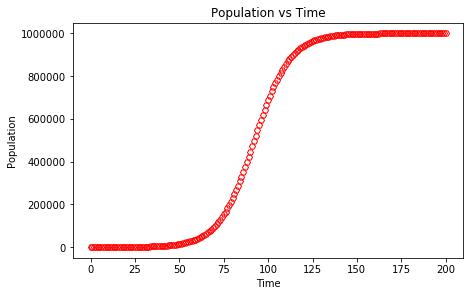

In [4]:
pyplot.figure(figsize=(fsx, fsy))
pyplot.plot(tca, pca, 'H', MFC=(1,0,0,0),mec='r');
pyplot.xlabel('Time');
pyplot.ylabel('Population');
pyplot.title('Population vs Time');

Let us compare this result to the exact (analytic) solutions for both the unconstrained and constrained solutions.  The functions p(t) and pc(t) below return the exact (analytic) solution for the unconstrained constrained growth problems.

In [5]:
M=CarryingCapacity
def p(t):
    return 100* exp(0.1 * t)
def pc(t):
    return Po*M*exp(r * t)/(M - Po + exp(r*t)*Po)
t_exact = [t for t in range(201)]
p_exact = [p(t) for t in range(201)]
pc_exact = [pc(t) for t in range(201)]

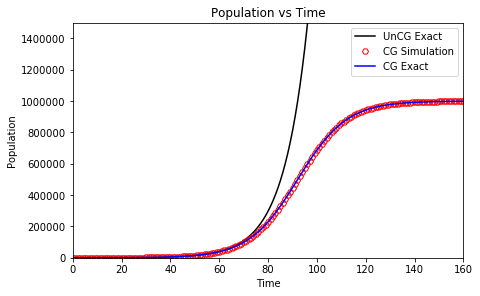

In [6]:
pyplot.figure(figsize=(fsx, fsy))
pyplot.plot(t_exact, p_exact, 'k-', label='UnCG Exact')
pyplot.plot(tca, pca, 'H', MFC=(1,0,0,0),mec='r', label='CG Simulation');
pyplot.plot(t_exact, pc_exact, 'b-', label='CG Exact')
pyplot.legend()
pyplot.axis([0, 160, 0, 1500000])
pyplot.xlabel('Time');
pyplot.ylabel('Population');
pyplot.title('Population vs Time');

There are several things to notice in this figure:
- The numerical simulation is fairly accurate when compared to the exact/analytic solution.
- In the beginning, $0<t<60$, the constrained and unconstrained solutions are very similar.  In this time range, the population, $P$, is much smaller than the carrying capacity, $M$, so the $\frac{dD}{dt}=r\frac{P}{M}P$ term has very little effect.
- In the late times, $t>140$ of the constrained growth situation the population, $P$, is very close to the carrying capacity, $M$, so the rate of deaths, $\frac{dD}{dt}=r\frac{P}{M}P$, is about equal to the rate of births, $\frac{dB}{dt}=rP$.  This gives a steady state situation in which the population does not change with time.

## Note on Plotting
When we plotted the functions above, we did so using a slightly different method than before.  The difference is than in this case, we imported the `matplotlib.pyplot` module using

    from matplotlib import pyplot

In other notebooks, we used

    from matplotlib.pyplot import *
or

    from pylab import *

These last two imports would work.  The difference is that they import all of their functions into the global [namespace](http://stackoverflow.com/a/3913488/6854613).  Also, pyplot imports both pyplot and [NumPy](http://www.numpy.org/) which efficiently implements array operations.  Following [the discussion in matplotlib's FAQ](http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related), it is probably best to use

    from matplotlib import pyplot

and keep the namespaces separate.  Many times you will see `from matplotlib import pyplot as plt`.  This just uses `plt` as an alias for `pyplot`.  Since the two are just about the same length, I will just use `pyplot`.

Above, we used

    pyplot.figure(figsize=(fsx, fsy))
    pyplot.plot(tca, pca, 'H', MFC=(1,0,0,0),mec='r');
    pyplot.xlabel('Time');
    pyplot.ylabel('Population');
    pyplot.title('Population vs Time');
    
to create our first figure.  In this case, matplotlib kept track of our figure and added/changed items until we were done with that cell.  It then displayed the cell.  While this does work, when we wanted to add data to the figure we had to repeat all of the initial calls.  There is perhaps an even better way in which we can manipulate the figure rather than having to recreate the figure.  The code below does just that.

### Different Plotting Method for More Control
Below we will create the plots again, but do it in a way that we have more control over the plot options and be able to reuse the figures rather than create them again.

First we create a figure and an [axes](http://matplotlib.org/api/axes_api.html) object with the code

    MyFigure, MyAxes = pyplot.subplots(1, 1);
    
In this:
- `MyFigure` and `MyAxes` are local variables to hold the figure and axes returned
- [subplots](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots) is a function which  returns a tuple of the figure object and the axes it contains.

In matplotlib, the [axes object](http://matplotlib.org/api/axes_api.html) is the main object for creating plots and manipulating the items in the plot.  With access to the axes object through the variable `MyAxes` we can add data and change the plot.

The code below again creates the first plot we created above.

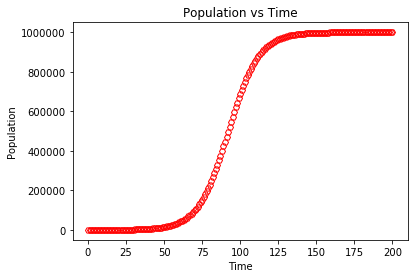

In [7]:
MyFigure, MyAxes = pyplot.subplots(1, 1);
MyAxes.plot(tca, pca, 'H', MFC=(1,0,0,0),mec='r', label='CG Simulation');
MyAxes.set_xlabel('Time');
MyAxes.set_ylabel('Population');
MyAxes.set_title('Population vs Time');

Now, to create the second figure with the exact solutions added, we just add the plots.  We do not need to create another figure.  The calls to [plot](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html#matplotlib.axes.Axes.plot) and [set_ylim](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylim.html#matplotlib.axes.Axes.set_ylim) are listed in the [axes documentation](http://matplotlib.org/api/axes_api.html).

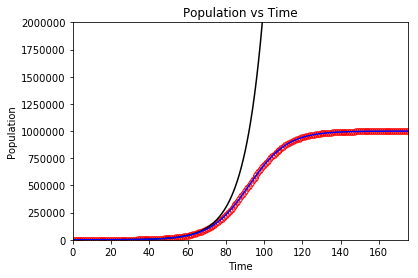

In [8]:
MyAxes.plot(t_exact, p_exact, 'k-', label='UnCG Exact')
MyAxes.plot(t_exact, pc_exact, 'b-', label='CG Exact')
MyAxes.set_ylim(bottom=0, top=2 * 10 **6)
MyAxes.set_xlim(left=0, right=175)
MyFigure

This plot is not really ready for presentation.  Its format could be improved by:
- Using scientific notation for the y axis values (Use [ticklabel_format](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html#matplotlib.axes.Axes.ticklabel_format)) .
- Increasing the font size of the axis values (Use [tick_params](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.tick_params.html#matplotlib.axes.Axes.tick_params)).
- Increasing the font size of the axis labels (Use [set_size](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_size) and [offsetText](http://stackoverflow.com/q/34227595/6854613)).
- Increasing the title font size (Also use [set_size](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_size)).
- Adding a legend (use [legend()](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html#matplotlib.axes.Axes.legend)).
- Increasing the figure size (use [set_size_inches](http://stackoverflow.com/a/4306340/6854613)).
- Adding a grid (use [grid](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html#matplotlib.axes.Axes.grid)).

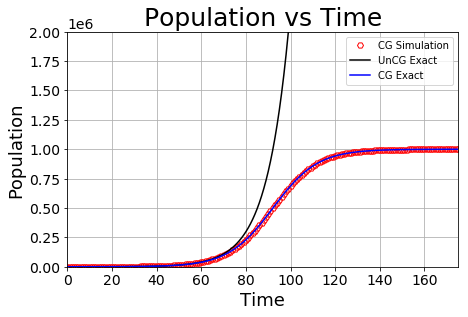

In [9]:
MyAxes.ticklabel_format(axis='y', style='sci',scilimits=(0,0))
MyAxes.tick_params(labelsize=14)
MyAxes.xaxis.label.set_size(18)
MyAxes.yaxis.label.set_size(18)
MyAxes.yaxis.offsetText.set_size(14)
MyAxes.title.set_size(25)
MyAxes.legend()
MyFigure.set_size_inches(fsx, fsy)
MyAxes.grid(1)
MyFigure

We can save the image as file using [savefig](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig).  Note that we have already specified the figure size in inches, so setting the dots per inch or dpi sets the total figure size.

In [10]:
MyFigure.savefig('Module_2_3_Figure.png',dpi=400)

Finally, note that depending on which part of a figure we want to modify we will use a different part of matplotlib or a different class.  They are:
- [axes](http://matplotlib.org/api/axes_api.html) for working with things like:
  -  [Adding a Plot](http://matplotlib.org/api/axes_api.html#plotting)
  -  [Setting the Properties of the Axis](http://matplotlib.org/api/axes_api.html#axis-limits)
  -  [Controlling the Tick Marks](http://matplotlib.org/api/axes_api.html#ticks-and-tick-labels)
  -  [Controlling or Adding Labels](http://matplotlib.org/api/axes_api.html#axis-labels-title-and-legend)
- [text](http://matplotlib.org/api/text_api.html) for controlling the text objects.  All the text items can be manipulated through these calls. There is a good table describing what can be manipulated in the [text documenation](http://matplotlib.org/api/text_api.html#matplotlib.text.Text).  Some of the things we can manipulate are:
  -  [setting the font size](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_size)
  -  [setting italic font](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_style)
  -  [setting the font](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_family)
  -  [setting the color](http://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_color)
  - he text on the plot are actually instances of the [text]
- [figure](http://matplotlib.org/api/figure_api.html) for the top level container.  We can actually have multiple axes in a given figure.  In our example, we used the figure class to set the size and save the figure.